# Install Packages and Import Libraries

First, we have to install packages and import libraries to conduct image segmentation with PyTorch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.__version__
import PIL
PIL.__version__
from PIL import Image
from glob import glob
import os
os.getcwd()
import cv2

import torch
torch.__version__
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
torchvision.__version__
from torchvision import transforms

In [2]:
!pip install -U segmentation-models-pytorch
import segmentation_models_pytorch as smp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.8 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=0f23b64f718da9d546d901fe599017944381c28365c10aba9661bc97b858d264
  Stored in directory: /root/.cache/pip/wheels/96/3f/5f/13976445f67f3b4e77b054e65f7f4c39016e92e8358fe088db
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60966 sha256=f7c7fe50b7948e33a9aba5f06db7c6854f3a5190bd6e45c430c03135d553e889
  Stored in directory: /root/.cache/pip/wheels/4f/89/a3/5cf59e30a8a75c917c313f14da0f6209be2d147e3160b985d6
Successfully built efficientnet-pytor

# Read CSV File

This csv file contains information as to **different classes of objects** that might be included in each image. Each class of object must have **a different color for distinction of different kinds of objects**. This table shows the corresponding colors to each class of object by the RGB values.

In [3]:
df = pd.read_csv('/kaggle/input/semantic-drone-dataset/class_dict_seg.csv')
df.head()

,name,r,g,b
0,unlabeled,0,0,0
1,paved-area,128,64,128
2,dirt,130,76,0
3,grass,0,102,0
4,gravel,112,103,87


This code shows the name of objects that can potentially appear in each image.

In [4]:
df.name

0       unlabeled
1      paved-area
2            dirt
3           grass
4          gravel
5           water
6           rocks
7            pool
8      vegetation
9            roof
10           wall
11         window
12           door
13          fence
14     fence-pole
15         person
16            dog
17            car
18        bicycle
19           tree
20      bald-tree
21      ar-marker
22       obstacle
23    conflicting
Name: name, dtype: object

These names are packed in a list for counting the number of classes, which is necessary for the machine learning process later.

In [5]:
class_list = df.name.values.tolist()
print(class_list)
len(class_list)

['unlabeled', 'paved-area', 'dirt', 'grass', 'gravel', 'water', 'rocks', 'pool', 'vegetation', 'roof', 'wall', 'window', 'door', 'fence', 'fence-pole', 'person', 'dog', 'car', 'bicycle', 'tree', 'bald-tree', 'ar-marker', 'obstacle', 'conflicting']


24

# Sample Images

It is important to see one or several sample original images as well as annotated images. They can be shown in the same way and in a pair. In addition, we should check the data size of these images.

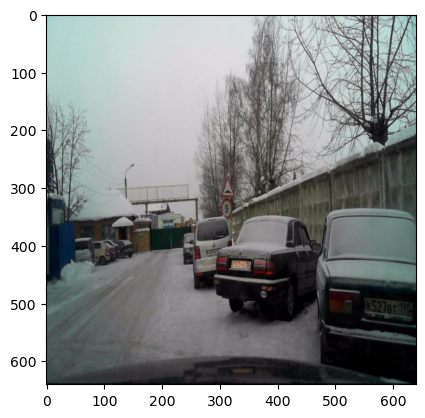

In [6]:
# original image
image = Image.open('/kaggle/input/12121212/dataset2/train/imgg/autosave01_02_2012_09_59_28_jpg.rf.b8d7c6125e9d2a03cbfea6f236d3d584.jpg')
image = np.array(image)
plt.imshow(image)

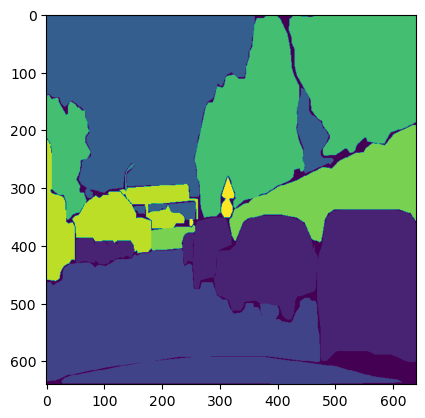

In [7]:
# label image
label = Image.open('/kaggle/input/12121212/dataset2/train/maskk/autosave01_02_2012_09_59_28_jpg.rf.b8d7c6125e9d2a03cbfea6f236d3d584_mask.png')
label = np.array(label)
plt.imshow(label)

In [8]:
image.shape, label.shape

((640, 640, 3), (640, 640))

In [9]:
image.min(), image.max()

(0, 247)

In [10]:
label.min(), label.max()

(0, 10)

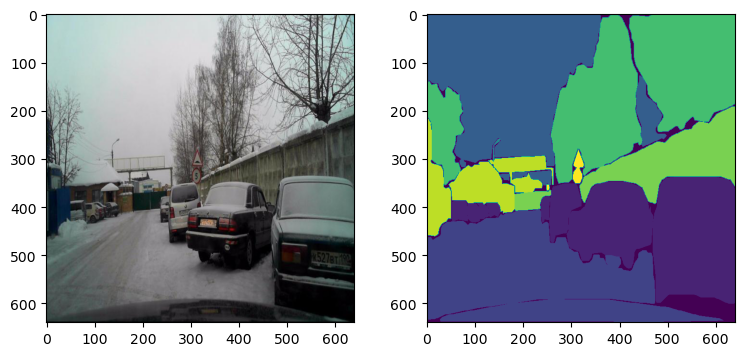

In [11]:
plt.figure(figsize = (9, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.imshow(label)

# Create Dataset and Dataloader

This is a typical sample code to create datasets to be used for training with PyTorch.

In [12]:
'''
class Dataset(torch.utils.data.Dataset):

    def __init__(self):
        self.images = sorted(glob('/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/*.jpg'))
        self.labels = sorted(glob('/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/*.png'))
        self.transform = transforms.Compose([ transforms.ToTensor() ])


    def __getitem__(self, idx):
        image_path = self.images[idx]
        image = Image.open(image_path)
        image = self.transform(image)

        label_path = self.labels[idx]
        label = Image.open(label_path)
        label = np.array(label)
        label = torch.tensor(label, dtype = torch.int64)
        return image, label


    def __len__(self):
        return len(self.images)
'''

"\nclass Dataset(torch.utils.data.Dataset):\n\n    def __init__(self):\n        self.images = sorted(glob('/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/original_images/*.jpg'))\n        self.labels = sorted(glob('/kaggle/input/semantic-drone-dataset/dataset/semantic_drone_dataset/label_images_semantic/*.png'))\n        self.transform = transforms.Compose([ transforms.ToTensor() ])\n\n\n    def __getitem__(self, idx):\n        image_path = self.images[idx]\n        image = Image.open(image_path)\n        image = self.transform(image)\n\n        label_path = self.labels[idx]\n        label = Image.open(label_path)\n        label = np.array(label)\n        label = torch.tensor(label, dtype = torch.int64)\n        return image, label\n\n\n    def __len__(self):\n        return len(self.images)\n"

In [13]:
class Dataset(torch.utils.data.Dataset):
    
      def __init__(
          self,
          transform = None,
          classes = None,
          augmentation = None
          ):
        self.imgpath_list = sorted(glob('/kaggle/input/datalast22/datalast/datalast/train/imgg/*.jpg'))
        self.labelpath_list = sorted(glob('/kaggle/input/datalast22/datalast/datalast/train/maskk/*.png'))

      def __getitem__(self, i):
                
        imgpath = self.imgpath_list[i]
        img = cv2.imread(imgpath)
        img = cv2.resize(img, dsize = (256, 256))
        img = img / 255
        img = torch.from_numpy(img.astype(np.float32)).clone()
        img = img.permute(2, 0, 1)

        labelpath = self.labelpath_list[i]
        label = Image.open(labelpath)
        label = np.asarray(label)
        label = cv2.resize(label, dsize = (256, 256))
        label = torch.from_numpy(label.astype(np.float32)).clone()
        label = torch.nn.functional.one_hot(label.long(), num_classes = len(class_list))
        label = label.to(torch.float32)
        label = label.permute(2, 0, 1)

        data = {"img": img, "label": label}
        return data

      def __len__(self):
            return len(self.imgpath_list)

In [14]:
dataset = Dataset()

In [15]:
len(dataset)

291

In [16]:
train, val, test = torch.utils.data.random_split(dataset = dataset, lengths = [230, 31, 30], generator = torch.Generator().manual_seed(42))

len(train), len(val), len(test)

(230, 31, 30)

In [17]:
batch_size = 4

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle = True, drop_last = True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

# Create a Model

We create an UNet model to learn segmentation tasks. 

In [18]:
class TwoConvBlock(nn.Module):
    def __init__(self, in_channels, middle_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, middle_channels, kernel_size = 3, padding = "same")
        self.bn1 = nn.BatchNorm2d(middle_channels)
        self.rl = nn.ReLU()
        self.conv2 = nn.Conv2d(middle_channels, out_channels, kernel_size = 3, padding = "same")
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.rl(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.rl(x)
        return x

class UpConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.up = nn.Upsample(scale_factor = 2, mode = "bilinear", align_corners = True)
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size = 2, padding = "same")
        self.bn2 = nn.BatchNorm2d(out_channels)

    def forward(self, x):
        x = self.up(x)
        x = self.bn1(x)
        x = self.conv(x)
        x = self.bn2(x)
        return x

class UNet_2D(nn.Module):
    def __init__(self):
        super().__init__()
        self.TCB1 = TwoConvBlock(3, 64, 64)
        self.TCB2 = TwoConvBlock(64, 128, 128)
        self.TCB3 = TwoConvBlock(128, 256, 256)
        self.TCB4 = TwoConvBlock(256, 512, 512)
        self.TCB5 = TwoConvBlock(512, 1024, 1024)
        self.TCB6 = TwoConvBlock(1024, 512, 512)
        self.TCB7 = TwoConvBlock(512, 256, 256)
        self.TCB8 = TwoConvBlock(256, 128, 128)
        self.TCB9 = TwoConvBlock(128, 64, 64)
        self.maxpool = nn.MaxPool2d(2, stride = 2)
        
        self.UC1 = UpConv(1024, 512) 
        self.UC2 = UpConv(512, 256) 
        self.UC3 = UpConv(256, 128) 
        self.UC4= UpConv(128, 64)

        self.conv1 = nn.Conv2d(64, 24, kernel_size = 1)
        self.soft = nn.Softmax(dim = 1)

    def forward(self, x):
        x = self.TCB1(x)
        x1 = x
        x = self.maxpool(x)

        x = self.TCB2(x)
        x2 = x
        x = self.maxpool(x)

        x = self.TCB3(x)
        x3 = x
        x = self.maxpool(x)

        x = self.TCB4(x)
        x4 = x
        x = self.maxpool(x)

        x = self.TCB5(x)

        x = self.UC1(x)
        x = torch.cat([x4, x], dim = 1)
        x = self.TCB6(x)

        x = self.UC2(x)
        x = torch.cat([x3, x], dim = 1)
        x = self.TCB7(x)

        x = self.UC3(x)
        x = torch.cat([x2, x], dim = 1)
        x = self.TCB8(x)

        x = self.UC4(x)
        x = torch.cat([x1, x], dim = 1)
        x = self.TCB9(x)

        x = self.conv1(x)

        return x

In [19]:
import optuna
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import segmentation_models_pytorch as smp

In [20]:
def objective(trial):
    # Гиперпараметры, которые будем оптимизировать
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-10, 1e-3)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = UNet_2D().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    BCELoss = smp.losses.SoftBCEWithLogitsLoss()
    TverskyLoss = smp.losses.TverskyLoss(mode='multilabel', log_loss=False)

    train_loader = DataLoader(...) # Настроить DataLoader
    val_loader = DataLoader(...)   # Настроить DataLoader


In [21]:
def criterion(pred, target):
        return 0.5 * BCELoss(pred, target) + 0.5 * TverskyLoss(pred, target)



In [115]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
unet = UNet_2D().to(device)
optimizer = optim.Adam(unet.parameters(), lr = 0.0011655360518329765)

In [116]:
TverskyLoss = smp.losses.TverskyLoss(mode = 'multilabel', log_loss = False)
BCELoss     = smp.losses.SoftBCEWithLogitsLoss()
def criterion(pred,target):
    return 0.5 * BCELoss(pred, target) + 0.5 * TverskyLoss(pred, target)

In [117]:
history = {"train_loss": []}
n = 0
m = 0
val_loss_min = np.Inf
validation_accuracy = []
validation_loss = []

for epoch in range(15):
  train_accuracy = 0
  train_loss = 0
  val_accuracy = 0
  val_loss = 0
  correct_pixels = 0
  total_pixels = 0

# training
  unet.train()
  for i, data in enumerate(train_loader):
    inputs, labels = data["img"].to(device), data["label"].to(device)
    optimizer.zero_grad()
    outputs = unet(inputs)
    
    # pixel accuracy
    thresholded_outputs = (outputs > 0.5).int()
    correct_pixels = (thresholded_outputs == labels).sum().item()
    total_pixels += (inputs.size(2) * inputs.size(3)) * inputs.size(0)
    train_acc = correct_pixels / total_pixels
    train_accuracy += train_acc
    
    # loss
    loss = criterion(outputs, labels)
    labels = ['Actual', 'Label', 'Predicted']

    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    history["train_loss"].append(loss.item())
    n += 1
    if i % ((len(train) // batch_size) // 10) == (len(train) // batch_size) // 10 - 1:
      print(f"epoch:{epoch + 1}  index:{i + 1}  train_accuracy:{train_accuracy / n:.5f}")
      print(f"epoch:{epoch + 1}  index:{i + 1}  train_loss:{train_loss / n:.5f}")
      n = 0
      train_accuracy = 0
      train_loss = 0

# validation
  unet.eval()
  with torch.no_grad():
    for i, data in enumerate(val_loader):
      inputs, labels = data["img"].to(device), data["label"].to(device)
      outputs = unet(inputs)
       
      # pixel accuracy
      thresholded_outputs = (outputs > 0.5).int()
      correct_pixels = (thresholded_outputs == labels).sum().item()
      total_pixels += (inputs.size(2) * inputs.size(3)) * inputs.size(0)
      val_acc = correct_pixels / total_pixels
      val_accuracy += val_acc  
       
      # loss
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      m += 1
      if i % (len(val) // batch_size) == len(val) // batch_size - 1:
        print(f"epoch:{epoch + 1}  index:{i + 1}  validation_accuracy:{val_accuracy / m:.5f}")
        print(f"epoch:{epoch + 1}  index:{i + 1}  validation_loss:{val_loss / m:.5f}")
        validation_accuracy.append(val_accuracy)
        validation_loss.append(val_loss)
        if val_loss < val_loss_min:
            val_loss_min = val_loss
            torch.save(unet.state_dict(), 'semantic_segmentation.pt')
            print('Detected network improvement, saving current model')
        
        m = 0
        val_accuracy = 0
        val_loss = 0
        
print("finish training")

epoch:1  index:5  train_accuracy:10.14583
epoch:1  index:5  train_loss:0.53541
epoch:1  index:10  train_accuracy:3.00273
epoch:1  index:10  train_loss:0.48694
epoch:1  index:15  train_accuracy:1.81408
epoch:1  index:15  train_loss:0.45136
epoch:1  index:20  train_accuracy:1.30475
epoch:1  index:20  train_loss:0.42032
epoch:1  index:25  train_accuracy:1.02427
epoch:1  index:25  train_loss:0.38816
epoch:1  index:30  train_accuracy:0.84218
epoch:1  index:30  train_loss:0.36247
epoch:1  index:35  train_accuracy:0.71128
epoch:1  index:35  train_loss:0.34728
epoch:1  index:40  train_accuracy:0.61798
epoch:1  index:40  train_loss:0.32707
epoch:1  index:45  train_accuracy:0.54539
epoch:1  index:45  train_loss:0.31413
epoch:1  index:50  train_accuracy:0.48809
epoch:1  index:50  train_loss:0.30347
epoch:1  index:55  train_accuracy:0.44090
epoch:1  index:55  train_loss:0.29539
epoch:1  index:7  validation_accuracy:0.38277
epoch:1  index:7  validation_loss:0.29672
Detected network improvement, sav

In [86]:

!pip install optuna
import optuna
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

def objective(trial):
    # Suggest hyperparameters
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-1)
    batch_size = 4
    n_filters = 4

    # Setup data loaders
    train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle = True, drop_last = True)
    val_loader = torch.utils.data.DataLoader(val, batch_size)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Initialize the model with suggested number of filters
    model = UNet_2D().to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    # Initialize metrics
    num_epochs = 10
    val_loss_min = float('inf')
    
    for epoch in range(num_epochs):
        model.train()
        train_acc, train_loss = 0, 0
        total_pixels, correct_pixels = 0, 0
        
        for data in train_loader:
            inputs, labels = data["img"].to(device), data["label"].to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            
            thresholded_outputs = (outputs > 0.5).int()
            correct_pixels = (thresholded_outputs == labels).sum().item()
            total_pixels = (inputs.size(2) * inputs.size(3)) * inputs.size(0)
            train_acc = correct_pixels / total_pixels
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        val_accuracy = 0
        val_loss = 0
        with torch.no_grad():
            m = 0
            for data in val_loader:
                inputs, labels = data["img"].to(device), data["label"].to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()
                m += 1
                
                thresholded_outputs = (outputs > 0.5).int()
                val_accuracy += (thresholded_outputs == labels).sum().item() / (inputs.size(2) * inputs.size(3) * inputs.size(0))
                
        val_loss /= m
        val_accuracy /= m
        
        trial.report(val_loss, epoch)
        
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()
        
        if val_loss < val_loss_min:
            val_loss_min = val_loss
            torch.save(model.state_dict(), 'semantic_segmentation.pt')
    
    return val_loss_min

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best hyperparameters:', study.best_trial.params)


[I 2024-04-25 22:10:23,849] A new study created in memory with name: no-name-f99f99f6-152c-48a8-b904-5cdbd423d8a6
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if __name__ == "__main__":
[I 2024-04-25 22:13:01,127] Trial 0 finished with value: 0.8718766048550606 and parameters: {'lr': 0.0021819223201835387}. Best is trial 0 with value: 0.8718766048550606.
[I 2024-04-25 22:15:38,787] Trial 1 finished with value: 1.3938894867897034 and parameters: {'lr': 2.5201877913795404e-05}. Best is trial 0 with value: 0.8718766048550606.
[I 2024-04-25 22:18:15,732] Trial 2 finished with value: 0.8523715659976006 and parameters: {'lr': 0.0046104094232558394}. Best is trial 2 with value: 0.8523715659976006.
[I 2024-04-25 22:20:52,253] Trial 3 finished with value: 0.97

Best hyperparameters: {'lr': 0.0046104094232558394}


# Training and Validation Loss

We visualize the transition of the accuracy and loss during the training.

Text(0, 0.5, 'loss')

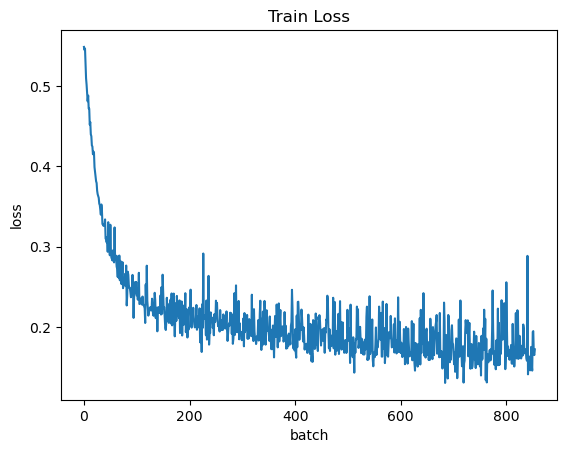

In [118]:
plt.title("Train Loss")
plt.plot(history["train_loss"])
plt.xlabel('batch')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

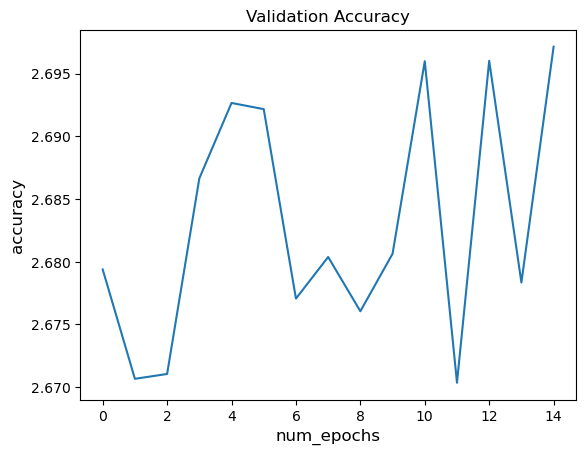

In [119]:
plt.title("Validation Accuracy")
plt.plot(validation_accuracy)
plt.xlabel('num_epochs', fontsize = 12)
plt.ylabel('accuracy', fontsize = 12)

Text(0, 0.5, 'loss')

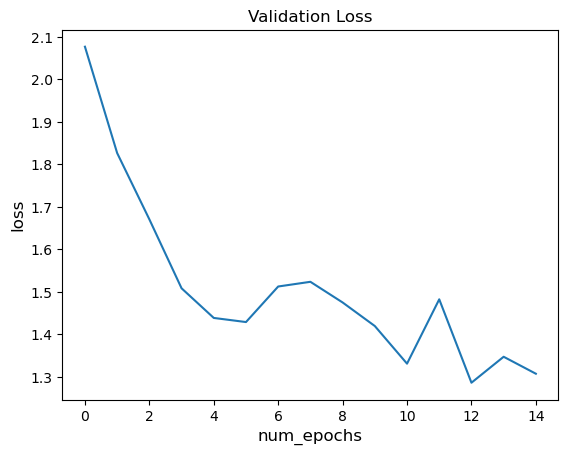

In [120]:
plt.title("Validation Loss")
plt.plot(validation_loss)
plt.xlabel('num_epochs', fontsize = 12)
plt.ylabel('loss', fontsize = 12)

# Load the Best Model

In [121]:
# import the trained network with the best loss of validation
unet.load_state_dict(torch.load('semantic_segmentation.pt'))

<All keys matched successfully>

# Prediction and Comparison with the Truth

We can compare the original images, annotated images, and predicted images to evaluate the performance by the trained segmentation model.

In [122]:
model = UNet_2D()
model.load_state_dict(torch.load("semantic_segmentation.pt"))
model.eval()
with torch.no_grad():
  data = next(iter(test_loader))
  inputs, labels = data["img"], data["label"]
  outputs = model(inputs)
  loss = criterion(outputs, labels)
  print("Loss: ", loss.item())

  thresholded_outputs = (outputs > 0.5).int()
  intersection = torch.logical_and(thresholded_outputs, labels).sum(dim = [1, 2, 3]).float()
  union = torch.logical_or(thresholded_outputs, labels).sum(dim = [1, 2, 3]).float()
  iou_score = (intersection / union).mean().item()
  print("Intersection over Union:", iou_score)
  
  dice_score = ((2 * intersection) / (thresholded_outputs.sum(dim=[1, 2, 3]) + labels.sum(dim=[1, 2, 3]))).mean().item()
  print("Dice coefficient:", dice_score)


sigmoid = nn.Sigmoid()
outputs = sigmoid(outputs)
pred = torch.argmax(outputs, axis = 1)
pred = torch.nn.functional.one_hot(pred.long(), num_classes = len(class_list)).to(torch.float32)

Loss:  0.15638048946857452
Intersection over Union: 0.7513115406036377
Dice coefficient: 0.8531418442726135


(-0.5, 255.5, 255.5, -0.5)

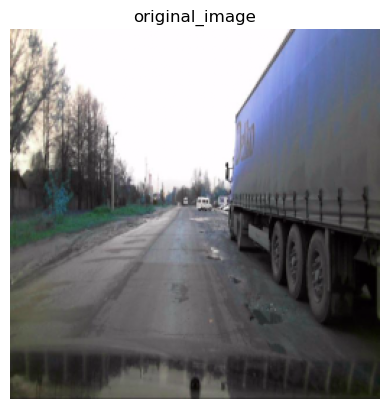

In [123]:
plt.figure()
plt.imshow(data["img"][1, :, :, :].permute(1, 2, 0))

plt.title("original_image")
plt.axis("off")

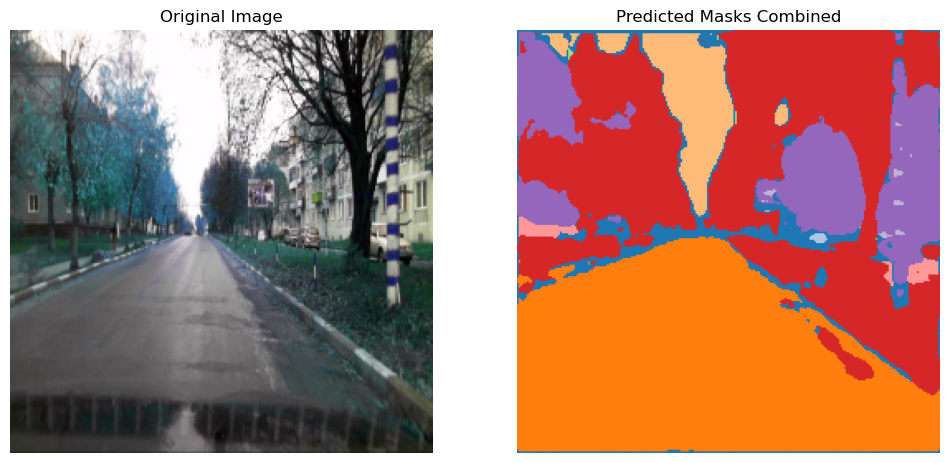

In [124]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.transforms.functional import to_pil_image
from matplotlib.colors import ListedColormap

# Подготовка модели к работе
model = UNet_2D()
model.load_state_dict(torch.load("semantic_segmentation.pt"))
model.eval()

# Сгенерировать цвета для каждого класса
num_classes = len(class_list)
colors = plt.cm.get_cmap('tab20', num_classes)  # Получение цветовой карты с num_classes цветами

# Обработка тестовых данных
with torch.no_grad():
    data = next(iter(test_loader))
    inputs, labels = data["img"], data["label"]
    outputs = model(inputs)
    
    sigmoid = nn.Sigmoid()
    outputs = sigmoid(outputs)
    
    # Получение предсказаний для каждого класса
    pred = torch.argmax(outputs, axis=1)
    
    # Создаем цветное изображение масок
    pred_color = colors(pred[2].cpu().numpy())  # Преобразуем значения в цвета с помощью выбранной цветовой карты
    pred_color_image = pred_color[..., :3]  # Удалить альфа-канал
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(to_pil_image(inputs[2]))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(pred_color_image)  # Отображение цветного изображения предсказаний
    plt.title('Predicted Masks Combined')
    plt.axis('off')

    plt.show()

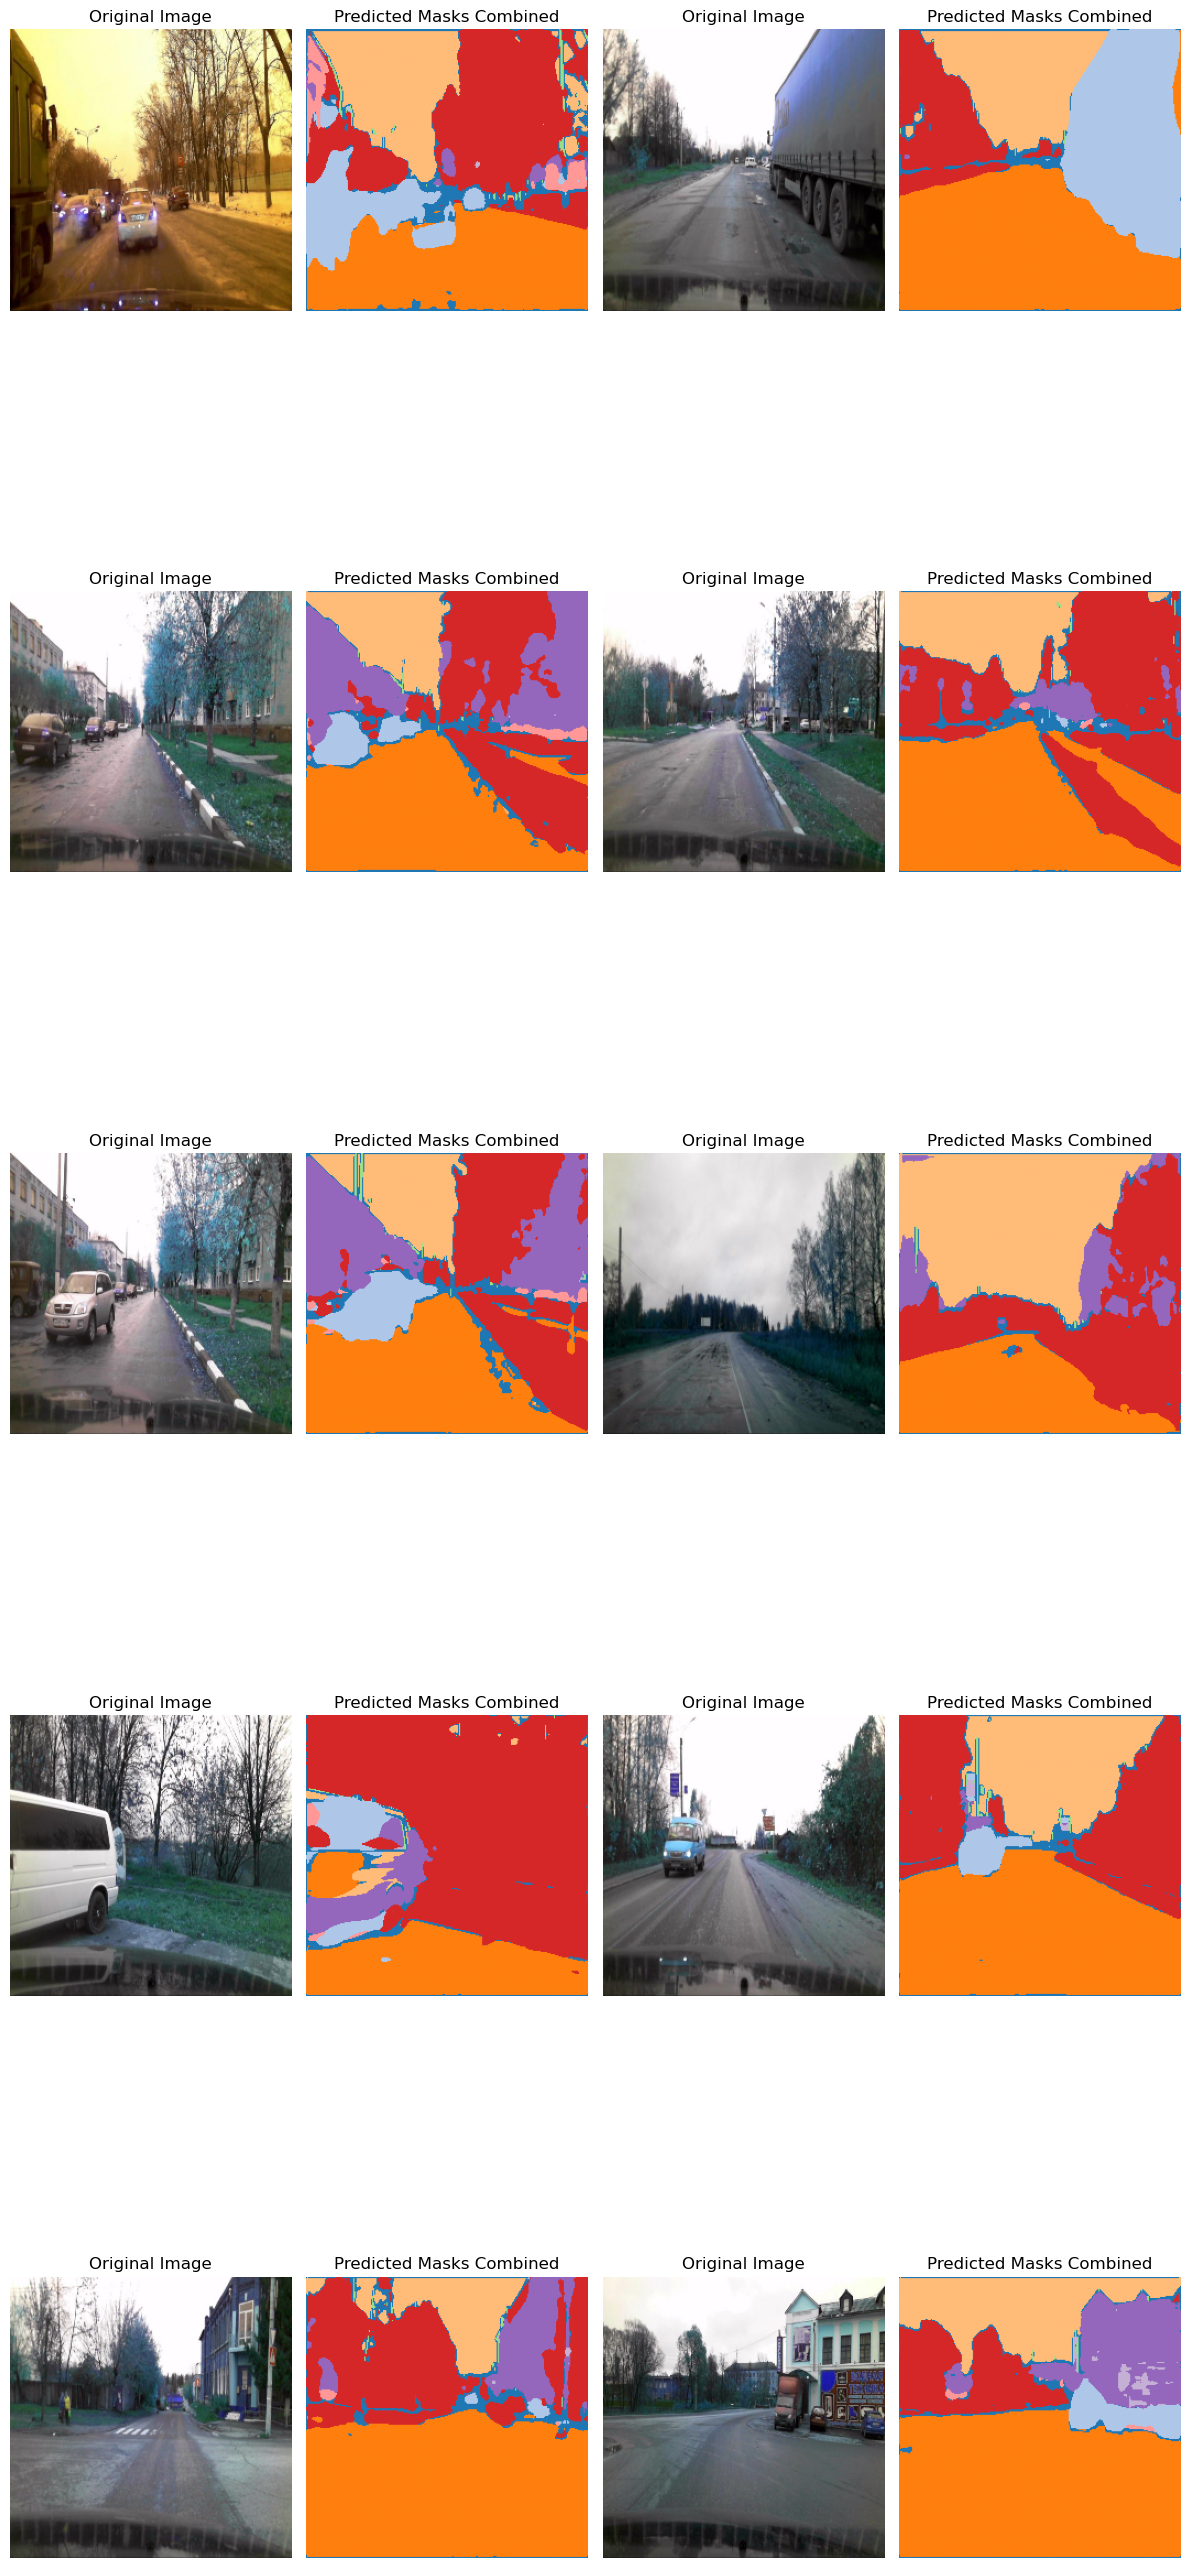

In [125]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchvision.transforms.functional import to_pil_image
from matplotlib.colors import ListedColormap

# Подготовка модели к работе
model = UNet_2D()
model.load_state_dict(torch.load("semantic_segmentation.pt"))
model.eval()

# Сгенерировать цвета для каждого класса
num_classes = len(class_list)
colors = plt.cm.get_cmap('tab20', num_classes)  # Получение цветовой карты с num_classes цветами

num_batches = 5  # Установка числа батчей для отображения
images_per_batch =2  # Количество изображений для отображения в каждом батче

fig, axes = plt.subplots(num_batches, images_per_batch * 2, figsize=(12, num_batches * 6))

for batch_idx, data in enumerate(test_loader):
    if batch_idx >= num_batches:
        break
    inputs, labels = data["img"], data["label"]
    outputs = model(inputs)
    
    sigmoid = nn.Sigmoid()
    outputs = sigmoid(outputs)
    
    # Получение предсказаний для каждого класса
    pred = torch.argmax(outputs, axis=1)

    for img_idx in range(images_per_batch):
        # Original image
        axes[batch_idx, img_idx * 2].imshow(to_pil_image(inputs[img_idx]))
        axes[batch_idx, img_idx * 2].set_title("Original Image")
        axes[batch_idx, img_idx * 2].axis('off')

        # Predicted mask
        pred_color = colors(pred[img_idx].cpu().numpy())
        pred_color_image = pred_color[..., :3]  # Удалить альфа-канал
        axes[batch_idx, img_idx * 2 + 1].imshow(pred_color_image)
        axes[batch_idx, img_idx * 2 + 1].set_title('Predicted Masks Combined')
        axes[batch_idx, img_idx * 2 + 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
classes = class_list
fig, ax = plt.subplots(2, 6, figsize = (15, 8))
for j, cl in enumerate(classes[6:12]):
    if i == 0 and j < 6:
        ax[i, j].imshow(pred[0, :, :, j])
        ax[i, j].set_title(f"pred_{cl}")
        ax[i, j].axis("off")
    elif j < 6:
        ax[i, j].imshow(data["label"][0, j, :, :])    
        ax[i, j].set_title(f"label_{cl}")
        ax[i, j].axis("off")

In [ ]:
classes = class_list
fig, ax = plt.subplots(2, 6, figsize = (15, 8))
for i in range(2):
    for j, cl in enumerate(classes[12:18]):
        if i == 0 and j < 6:
            ax[i, j].imshow(pred[0, :, :, j])
            ax[i, j].set_title(f"pred_{cl}")
            ax[i, j].axis("off")
        elif j < 6:
            ax[i, j].imshow(data["label"][0, j, :, :])    
            ax[i, j].set_title(f"label_{cl}")
            ax[i, j].axis("off")

In [ ]:
classes = class_list
fig, ax = plt.subplots(2, 6, figsize = (15, 8))
for i in range(2):
    for j, cl in enumerate(classes[18:]):
        if i == 0 and j < 6:
            ax[i, j].imshow(pred[0, :, :, j])
            ax[i, j].set_title(f"pred_{cl}")
            ax[i, j].axis("off")
        elif j < 6:
            ax[i, j].imshow(data["label"][0, j, :, :])    
            ax[i, j].set_title(f"label_{cl}")
            ax[i, j].axis("off")